In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

# Draw with FFT

## 2D case

### Prepare data

In [2]:
def draw2d(points, marker=None):
    assert points.shape[1] == 2
    plt.axes().set_aspect('equal', 'datalim')
    plt.plot(points[:, 0], points[:, 1], marker=marker)
    plt.show()

def interpolate(points, n):
    assert points.shape[1] == 2
    assert n > 0
    n_original = points.shape[0]
    indices = np.arange(0, n - 1)
    indices_translated = indices / (n - 1) * (n_original - 1)
    indices_translated_whole_number = np.floor(indices_translated).astype(np.int)
    indices_translated_fractional_part = indices_translated - indices_translated_whole_number
    v1 = points[indices_translated_whole_number]
    diff = points[indices_translated_whole_number + 1] - v1
    diff_translated = diff * (indices_translated_fractional_part.reshape(-1, 1) @ np.ones((1, 2)))
    new_points = v1 + diff_translated
    new_points = np.concatenate((new_points, points[-1].reshape(1,2)))
    return new_points

(128, 2)


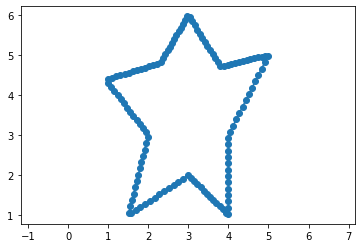

In [3]:
data_star = np.array([
    [1, 4.4],
    [2.3, 4.8],
    [3, 6],
    [3.8, 4.7],
    [5, 5],
    [4, 3],
    [4, 1],
    [3, 2],
    [1.5, 1],
    [2, 3],
    [1, 4.3],
])

N = 128
data = data_star
data = interpolate(data, N)
print(data.shape)
draw2d(data, marker='o')

### Run FFT

data_freq.shape (128,)


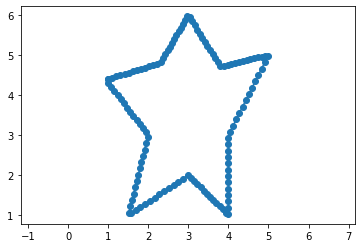

In [4]:
# encode points as complex numbers
# run fft with the encoded data
data_freq = fft(data[:,0] + 1j * data[:,1])/N

print("data_freq.shape", data_freq.shape)

T = N + 1
t = np.linspace(0, 1, T).reshape(1, T)

amplitudes = np.abs(data_freq).reshape(N,1)
phases = np.angle(data_freq).reshape(N,1)
k = np.arange(0, N).reshape(N,1)
_kt = k * t
_data = np.sum(amplitudes * (np.cos(2*np.pi*_kt + phases) + 1j * np.sin(2*np.pi*_kt + phases)), axis=0)
_data = np.array([np.real(_data), np.imag(_data)]).T
draw2d(_data, marker='o')

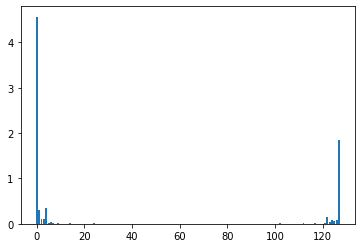

In [5]:
plt.bar(np.arange(N), amplitudes.flatten())
plt.show()

### Draw without minor contribution

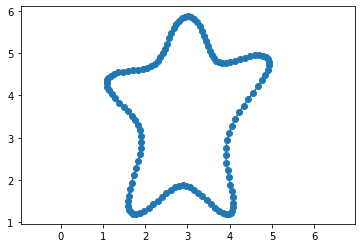

In [6]:
major_amplitudes = np.array(amplitudes)
major_amplitudes[amplitudes < 0.05] = 0

_data = np.sum(major_amplitudes * (np.cos(2*np.pi*_kt + phases) + 1j * np.sin(2*np.pi*_kt + phases)), axis=0)
_data = np.array([np.real(_data), np.imag(_data)]).T
draw2d(_data, marker='o')

## 1D case

(256,)


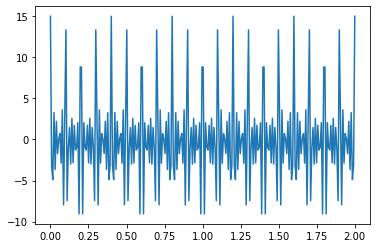

(256,)


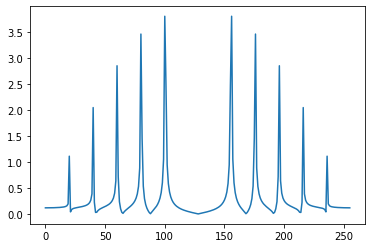

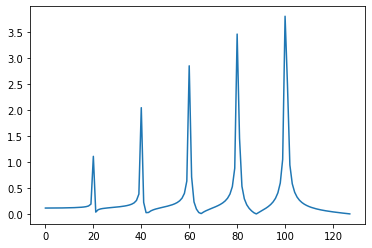

In [7]:
N = 256
t = 2 * np.arange(0, N) / (N - 1)
print(t.shape)
def x(t, n=5):
    assert len(t.shape) == 1
    T = t.shape[0]
    result = np.zeros(T)
    for i in range(1, n + 1):
        result += i * np.cos((i*10)*2*np.pi*t)
    return result

data = np.array([t, x(t)]).T
plt.plot(data[:, 0], data[:, 1])
plt.show()

half = N//2
data_freq = fft(data[:,1])
data_freq /= half

amplitudes = np.abs(data_freq).reshape(N,1)
phases = np.angle(data_freq).reshape(N,1)

f = np.arange(N)
print(f.shape)

plt.plot(f, amplitudes)
plt.show()

plt.plot(f[:half], amplitudes[:half])
plt.show()